<a href="https://colab.research.google.com/github/dwiawen/smartcity/blob/main/CitizensNeedsNaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes Classifier Prossess

In [ ]:
!pip install tweepy

In [ ]:
import tweepy
import csv
from tweepy import OAuthHandler

In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [ ]:
import preprocessor as p
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SENTIMENT ANALYSIS RESEARCH/translate_transportasibersih.csv')

In [ ]:
ps = PorterStemmer()

def stemming_data(x):
    return ps.stem(x)

data['Tweet_Text'] = data['Tweet_Text'].apply(stemming_data)

In [ ]:
data_tweet = list(data['Tweet_Text'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif +- 1
        status.append('Negatif')

    total += 1


print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 1315
Netral = 966
Negatif = 0

Total Data : 2810


In [ ]:
status = pd.DataFrame({'klasifikasi': status})
data['klasifikasi'] = status
data.tail()

,Tweet_Text,klasifikasi
2805,climate change control practices less use of e...,Positif
2806,"oot asking for the jambi command, all support ...",Netral
2807,"kom edhie baskoro, east java, comfortable, saf...",Positif
2808,kom edhie baskoro jatim train transportation h...,Positif
2809,"roads, modes of mass transportation, trains, s...",Positif


In [ ]:
data.to_excel('dataklasifikasibayes.xlsx', index=False)

In [ ]:
def show_pie(label, data, legend_title) :
  fig, ax = plt.subplots(figsize=(8, 9), subplot_kw=dict(aspect=np.equal))

  labels = [x.split()[-1] for x in label]

  def func(pct, allvals):
      absolute = int(pct/100.*np.sum(allvals))
      return '{:.1f}% ({:d})'.format(pct, absolute)

  wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                    textprops=dict(color="w"))

  ax.legend(wedges, labels,
            title= legend_title,
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1))

  plt.setp(autotexts, size=10, weight='bold')
  plt.show()


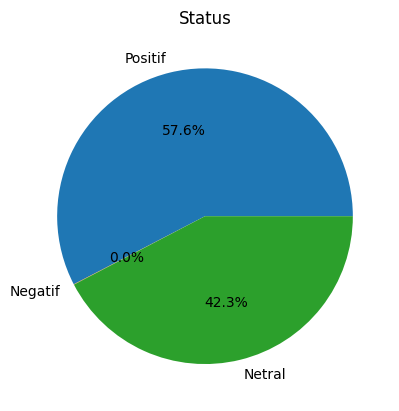

In [ ]:
label = ['Positif', 'Negatif', 'Netral']
count_data = [total_positif + 1, total_negatif + 1, total_netral + 1]

plt.pie(count_data, labels=label, autopct='%1.1f%%')
plt.title("Status")
plt.show()


# Naive Bayes Classifier Classification

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
dataset = data.drop([], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]
data.head(10)

,Tweet_Text,klasifikasi
0,develop mass public transportation system inte...,Negatif
1,"tickets for meals, drinks, transportation, acc...",Negatif
2,"jakarta's public transportation is good, there...",Positif
3,"concert venues require a ride, an option to ta...",Netral
4,support less emission electrification of motor...,Netral
5,"i thought when discussing parents, i had to pa...",Positif
6,the team wears public masks like public transp...,Positif
7,transpoasi class train airplane wise out of or...,Positif
8,morning universe cute means of transportation ...,Positif
9,"i'm sorry, for the condition of the fortune, t...",Negatif


In [ ]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if(n[1] == 'Positif'):
      set_positif.append(n)
    elif(n[1] == 'Negatif'):
      set_negatif.append(n)
    else:
      set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
    train_set.append(n)


In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print('Akurasi Test:', cl.accuracy(dataset))

Akurasi Test: 0.80355871886121


In [ ]:
data_tweet = list(data['Tweet_Text'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1

    status.append(analysis.classify())
    total += 1

print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 1310
Netral = 1199
Negatif = 301

Total Data : 2810


In [ ]:
status = pd.DataFrame({'klasifikasi_bayes': status})
data['klasifakasi_bayes'] = status
data.tail()

,Tweet_Text,klasifikasi,klasifakasi_bayes
2805,climate change control practices less use of e...,Positif,Positif
2806,"oot asking for the jambi command, all support ...",Netral,Netral
2807,"kom edhie baskoro, east java, comfortable, saf...",Positif,Positif
2808,kom edhie baskoro jatim train transportation h...,Positif,Netral
2809,"roads, modes of mass transportation, trains, s...",Positif,Positif


In [ ]:
data.to_excel('dataklasifikasibayes.xlsx', index=False)

2810


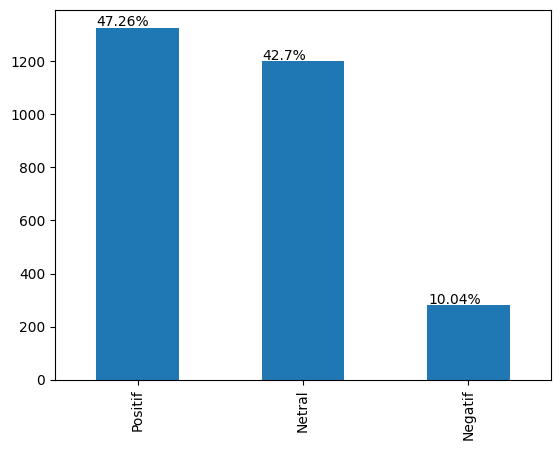

In [ ]:
s = pd.value_counts(data['klasifakasi_bayes'])
ax = s.plot.bar()
n = len(data.index)
print (n)
for p in ax.patches:
    ax.annotate(str(round(p.get_height() / n * 100, 2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

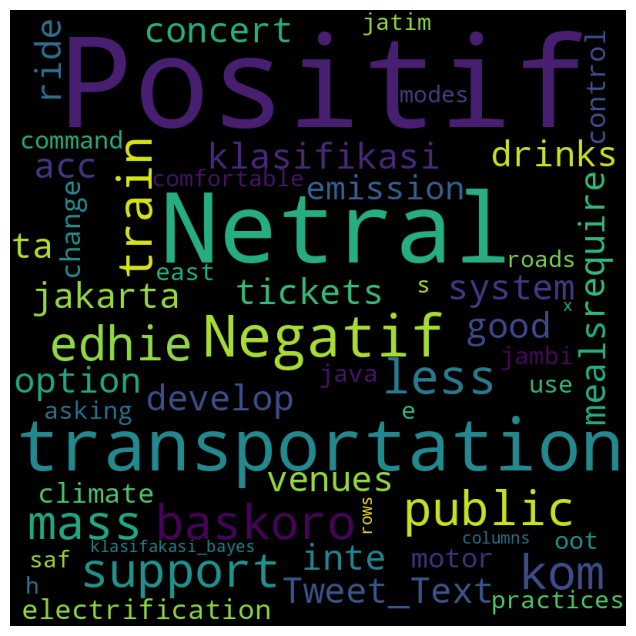

In [ ]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width= 800, height= 800, background_color= 'black', max_words= 1000,
                      min_font_size= 20).generate(str(data))

#plot the world cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Wordcloud of Negative Sentiment


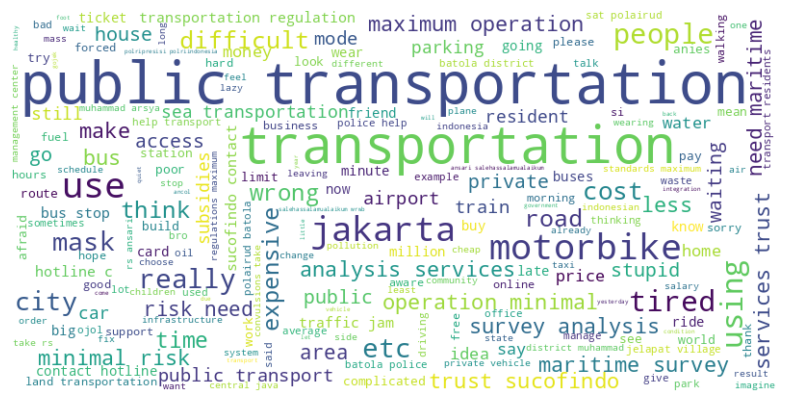

In [ ]:
# Filter the DataFrame to select only "Negatif" tweets
negatif_tweets = data[data['klasifakasi_bayes'] == 'Negatif']

# Concatenate the selected tweets into a single string
all_words = ' '.join(negatif_tweets['Tweet_Text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Wordcloud of Positive Sentiment

---



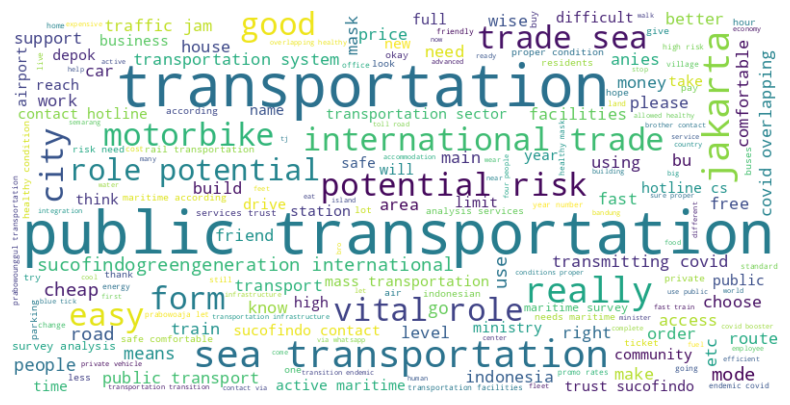

In [ ]:
# Filter the DataFrame to select only "Positif" tweets
positif_tweets = data[data['klasifakasi_bayes'] == 'Positif']

# Concatenate the selected tweets into a single string
all_words = ' '.join(positif_tweets['Tweet_Text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Wordcloud of Neutral Sentiment

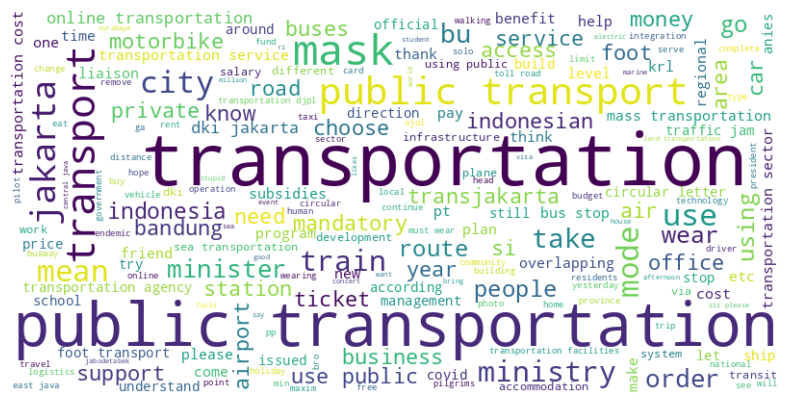

In [ ]:
# Filter the DataFrame to select only "Netral" tweets
netral_tweets = data[data['klasifakasi_bayes'] == 'Netral']

# Concatenate the selected tweets into a single string
all_words = ' '.join(netral_tweets['Tweet_Text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
!pip install nltk

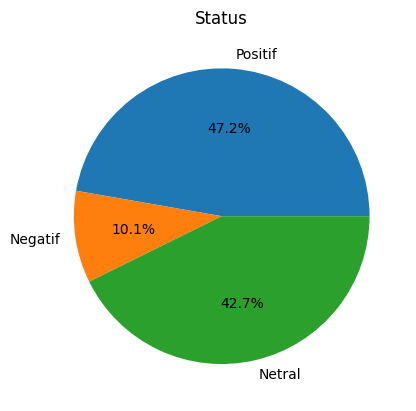

In [ ]:
label = ['Positif', 'Negatif', 'Netral']
count_data = [total_positif + 1, total_negatif + 1, total_netral + 1]

plt.pie(count_data, labels=label, autopct='%1.1f%%')
plt.title("Status")
plt.show()

# Accuration

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(data['klasifikasi'], data['klasifakasi_bayes']))

              precision    recall  f1-score   support

     Negatif       0.89      0.47      0.62       529
      Netral       0.74      0.92      0.82       966
     Positif       0.84      0.85      0.84      1315

    accuracy                           0.80      2810
   macro avg       0.82      0.75      0.76      2810
weighted avg       0.81      0.80      0.79      2810



In [ ]:
!pip install nltk
!pip install collections
!pip install stop-words

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections
  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32897 sha256=5c44825fc82affbe32b8dfb81a292cb3bec9317526db5a4ce2ec87cd1e330bd6
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Filter the DataFrame to select only "Negatif" tweets
negatif_tweets = data[data['klasifakasi_bayes'] == 'Negatif']

# Concatenate the selected tweets into a single string
all_words = ' '.join(negatif_tweets['Tweet_Text'])

# Tokenize the text into individual words
words = all_words.split()

# Filter out stopwords and lemmatize the remaining words
stopwords_set = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
filtered_words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stopwords_set]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Get the top 10 most frequent words
top_words = word_counts.most_common(10)

# Display the top 10 words
for word, count in top_words:
    print(f'{word}: {count}')


transportation: 210
public: 179
transportation,: 78
like: 46
i'm: 37
bus: 35
use: 34
really: 30
jakarta: 27
motorbike: 26
